##An example of RCT with data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import graphviz as gr

In this hypothetical situation, an NGO is planning on launching a training program designed to boost incomes. Based on their experiences in running pilot programs in other countries, they’ve found that older, richer men tend to self-select into the training program. The NGO’s evaluation consultant (you!) drew this causal model explaining the effect of the program on participant incomes, given the confounding caused by age, sex, and prior income

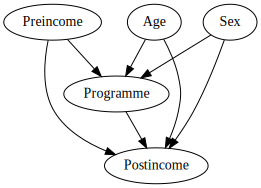

In [2]:
g = gr.Digraph()
g.edge("Preincome", "Programme"), g.edge("Preincome", "Postincome"), g.edge("Programme", "Postincome"),g.edge("Age", "Programme"), g.edge("Age", "Postincome"),g.edge("Sex", "Programme"), g.edge("Sex", "Postincome")
g

The NGO just received funding to run a randomized controlled trial (RCT) in a village, and you’re excited because you can finally manipulate access to the program—you can calculate $\mathbb{E}[Postincome|do(Programme)]$. Following the rules of causal diagrams, you get to delete all the arrows going into the program node:

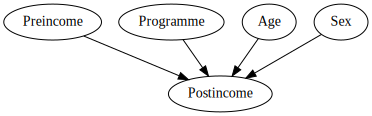

In [3]:
g_rct = gr.Digraph()
g_rct.edge("Preincome", "Postincome"), g_rct.edge("Programme", "Postincome"), g_rct.edge("Age", "Postincome"), g_rct.edge("Sex", "Postincome")
g_rct

Data exploration

In [11]:
df=pd.read_csv('/content/village_randomized.csv')
df

,id,sex,age,pre_income,program,post_income,sex_num,program_num
0,1,Male,45,979.407453,No program,1281.490982,1,0
1,2,Female,23,663.545110,No program,1041.346836,0,0
2,3,Female,42,729.256002,No program,1247.336819,0,0
3,4,Female,34,744.371565,Program,1248.704147,0,1
4,5,Female,53,768.991891,No program,1342.932254,0,0
...,...,...,...,...,...,...,...,...
995,996,Male,35,637.734280,No program,1195.449627,1,0
996,997,Female,50,845.625777,Program,1426.746177,0,1
997,998,Male,41,818.407329,No program,1246.869065,1,0
998,999,Female,53,805.797636,No program,1349.237168,0,0


##Check balance

You ran the study on 1,000 participants over the course of 6 months and you just got your data back.

Before calculating the effect of the program, you first check to see how well balanced assignment was, and you find that assignment to the program was pretty much split 50/50, which is good

Size of the total population

In [5]:
n_total=len(df.index)

Size of the control group

In [6]:
n_noprogram=len(df[df['program']=='No program'].index)

Size of the treatment group

In [7]:
n_program=len(df[df['program']=='Program'].index)

Summarize

In [8]:
array = np.array([[n_noprogram,n_noprogram/n_total],[n_program,n_program/n_total]])
index_values = ['No program','Program']
column_values = ['Count', 'Proportion']

In [9]:
count_df = pd.DataFrame(data = array,index = index_values,columns = column_values)
count_df

,Count,Proportion
No program,503.0,0.503
Program,497.0,0.497


Comparison of caracteristics of control group and treatment groups

In [12]:
df_np=df[df['program']=='No program']
df_np.describe()

,id,age,pre_income,post_income,sex_num,program_num
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.0
mean,491.306163,34.924453,803.329778,1179.977293,0.584493,0.0
std,290.306840,9.383287,101.506667,94.598373,0.493300,0.0
min,1.000000,6.000000,544.998552,880.158269,0.000000,0.0
25%,242.000000,29.000000,733.652041,1117.320179,0.000000,0.0
50%,488.000000,35.000000,805.665067,1181.743386,1.000000,0.0
75%,736.000000,41.000000,871.631933,1242.057069,1.000000,0.0
max,1000.000000,62.000000,1116.793765,1441.986926,1.000000,0.0


In [13]:
df_p=df[df['program']=='Program']
df_p.describe()

,id,age,pre_income,post_income,sex_num,program_num
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.0
mean,509.804829,34.855131,801.479890,1279.225173,0.603622,1.0
std,287.298724,9.598762,105.156600,96.907668,0.489638,0.0
min,4.000000,6.000000,487.841044,978.941979,0.000000,1.0
25%,259.000000,29.000000,732.592979,1218.631974,0.000000,1.0
50%,512.000000,35.000000,801.801591,1285.887273,1.000000,1.0
75%,765.000000,41.000000,868.507391,1346.743730,1.000000,1.0
max,997.000000,62.000000,1102.247561,1560.954199,1.000000,1.0


These variables appear fairly well balanced. We visualize the distribution of each variable

<Axes: xlabel='age', ylabel='program'>

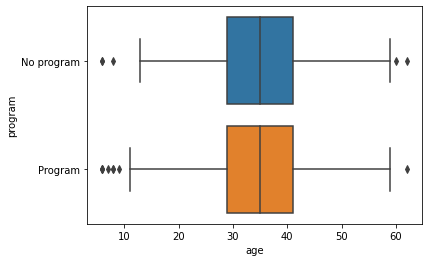

In [14]:
sns.boxplot(data=df, x="age", y="program")

<Axes: xlabel='pre_income', ylabel='program'>

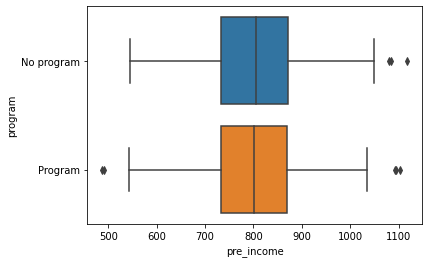

In [15]:
sns.boxplot(data=df, x="pre_income", y="program")

We now check that there are not any statistically significant differences between the groups.

Test on gender proportions

In [ ]:
stats.ks_2samp(df_p['sex_num'].values, df_np['sex_num'].values)

KstestResult(statistic=0.01912868863279078, pvalue=0.9999632304521416)

Test on age

In [ ]:
stats.ks_2samp(df_p['age'].values, df_np['age'].values)

KstestResult(statistic=0.019384697849122567, pvalue=0.9999501162536755)

Test on preincome

In [ ]:
stats.ks_2samp(df_p['pre_income'].values, df_np['pre_income'].values)

KstestResult(statistic=0.03698533147193299, pvalue=0.865036080983972)

##Estimate difference

You are interested in the causal effect of the program
$$\mathbb{E}[Post income|do(Program)]$$

 
 


You can find this causal effect by calculating the average treatment effect:
$$\mathbb{E}[Postincome|Program=1]-\mathbb{E}[Postincome|Program=0]$$

In [ ]:
df_p['post_income'].mean()-df_np['post_income'].mean()

99.24787965568271